# SPECFEM3D - noteboook

## Simple Google Colab example

To open this notebook in Google Colab, follow this link:

[google colab - specfem3d-colab-example.ipynb](https://colab.research.google.com/github/SPECFEM/specfem3d/blob/devel/EXAMPLES/notebooks/specfem3d-colab-example.ipynb)


This script will load the SPECFEM3D github repository and run a default example for testing.

To enable the GPU:
- navigate to Edit -> **Notebook Settings**...<br>
  and select **T4 GPU** from the Hardware Accelerator drop-down

# Setup

system info:

In [1]:
! uname -a

Linux b72b9e0e8168 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


for GPU nodes:

In [2]:
! nvidia-smi

import os
gpu = os.environ['COLAB_GPU']
if len(gpu) == 0:
  has_gpu = False
  print("runtime has no gpu")
else:
  has_gpu = True
  print("gpu: ",gpu)

Mon Feb 12 15:48:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

current directory:

In [3]:
! pwd
! ls -al

/content
total 16
drwxr-xr-x 1 root root 4096 Feb  8 14:21 .
drwxr-xr-x 1 root root 4096 Feb 12 15:46 ..
drwxr-xr-x 4 root root 4096 Feb  8 14:20 .config
drwxr-xr-x 1 root root 4096 Feb  8 14:21 sample_data


compilers:

In [4]:
! which gcc
! which gfortran
! which nvcc

/usr/bin/gcc
/usr/bin/gfortran
/usr/local/cuda/bin/nvcc


In [5]:
! gcc --version
! gfortran --version
! nvcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
! which mpif90
! which mpirun

/usr/bin/mpif90
/usr/bin/mpirun


In [7]:
! mpif90 --version
! mpirun --version

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

mpirun (Open MPI) 4.1.2

Report bugs to http://www.open-mpi.org/community/help/


download SPECFEM3D repository:

In [8]:
! git clone --branch devel https://github.com/SPECFEM/specfem3d.git

Cloning into 'specfem3d'...
remote: Enumerating objects: 60340, done.
remote: Counting objects: 100% (5296/5296), done.
remote: Compressing objects: 100% (1679/1679), done.
remote: Total 60340 (delta 3667), reused 4993 (delta 3582), pack-reused 55044
Receiving objects: 100% (60340/60340), 659.23 MiB | 27.55 MiB/s, done.
Resolving deltas: 100% (44883/44883), done.
Updating files: 100% (6367/6367), done.


# Configuration

Let's configure and compile the package:

In [9]:
%cd /content/specfem3d
! ls -al

/content/specfem3d
total 716
drwxr-xr-x 21 root root   4096 Feb 12 15:49 .
drwxr-xr-x  1 root root   4096 Feb 12 15:48 ..
-rw-r--r--  1 root root    133 Feb 12 15:49 AUTHORS
drwxr-xr-x  2 root root   4096 Feb 12 15:49 .azure-pipelines
-rw-r--r--  1 root root   6190 Feb 12 15:49 .azure-pipelines.yml
drwxr-xr-x  2 root root   4096 Feb 12 15:49 bin
-rw-r--r--  1 root root   4834 Feb 12 15:49 CITATION.cff
-rw-r--r--  1 root root     77 Feb 12 15:49 .codecov.yml
-rwxr-xr-x  1 root root  50622 Feb 12 15:49 config.guess
-rwxr-xr-x  1 root root  36482 Feb 12 15:49 config.sub
-rwxr-xr-x  1 root root 369255 Feb 12 15:49 configure
-rw-r--r--  1 root root  24216 Feb 12 15:49 configure.ac
-rw-r--r--  1 root root   4558 Feb 12 15:49 CONTRIBUTING.md
drwxr-xr-x  5 root root   4096 Feb 12 15:49 CUBIT_GEOCUBIT
drwxr-xr-x  2 root root   4096 Feb 12 15:49 DATA
drwxr-xr-x  8 root root   4096 Feb 12 15:49 doc
drwxr-xr-x  2 root root   4096 Feb 12 15:49 .docker
-rw-r--r--  1 root root   1097 Feb 12 15:49 .do

now configure with CUDA support:

In [10]:
#debugging
#! ./configure --enable-debug --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64

# default w/ CUDA support
! ./configure --enable-vectorization --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64 FLAGS_CHECK="-O2 -Wall -Wno-do-subscript -Wno-conversion -Wno-maybe-uninitialized"


## ---------------------------- ##
## setting up compilation flags ##
## ---------------------------- ##
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gfortran... gfortran
checking whether the Fortran compiler works... yes
checking for Fortran compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU Fortran... yes
checking whether gfortran accepts -g... yes
configure: running /bin/bash ./flags.guess
checking how to get verbose linking output from gfortran... -v
checking for Fortran libraries of gfortran...  -L/usr/lib/gcc/x86_64-linux-gnu/11 -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../../lib -L/lib/x86_64-linux-gnu -L/lib/../lib -L/usr/lib/x86_64-linux-gnu -L/usr/lib/../lib -L/usr/local/cuda/lib64/stubs -L/us

compile the code:

In [11]:
! sed -i "s:IMAIN =.*:IMAIN = ISTANDARD_OUTPUT:" setup/constants.h
! make clean
! make -j2 all

cleaning all
rm -f  ./obj/combine_surf_data.aux.o  ./obj/combine_vol_data.aux.o ./obj/combine_vol_data_impl.aux.o  ./obj/combine_vol_data.aux_vtk.o ./obj/combine_vol_data_impl.aux.o  ./obj/combine_vol_data.aux_vtu.o ./obj/combine_vol_data_impl.aux.o  ./obj/combine_vol_data_vtk_binary.aux.o ./obj/combine_vol_data_impl.aux.o ./obj/vtk_writer.aux.o  ./obj/create_movie_shakemap_AVS_DX_GMT.aux.o  ./obj/convolve_source_timefunction.aux.o  ./obj/detect_duplicates_stations_file.aux.o   ./obj/project_and_combine_vol_data_on_regular_grid.aux.o ./obj/vtk_writer.aux.o  ./obj/combine_vol_data_mod.mod ./obj/combine_vtk_par.mod  ./bin/xcombine_surf_data ./bin/xcombine_vol_data ./bin/xcombine_vol_data_vtk ./bin/xcombine_vol_data_vtu ./bin/xcombine_vol_data_vtk_bin ./bin/xconvolve_source_timefunction ./bin/xdetect_duplicates_stations_file ./bin/xcreate_movie_shakemap_AVS_DX_GMT  ./bin/xproject_and_combine_vol_data_on_regular_grid  ./obj/check_mesh_quality.check.o ./obj/convert_skewness_to_angle.check.o

In [12]:
! ls -al ./bin

total 16740
drwxr-xr-x  2 root root    4096 Feb 12 15:53 .
drwxr-xr-x 21 root root    4096 Feb 12 15:49 ..
-rw-r--r--  1 root root       0 Feb 12 15:49 .keep
-rwxr-xr-x  1 root root  679384 Feb 12 15:53 xadd_model_iso
-rwxr-xr-x  1 root root  144208 Feb 12 15:53 xcheck_mesh_quality
-rwxr-xr-x  1 root root  124408 Feb 12 15:53 xclip_sem
-rwxr-xr-x  1 root root  128608 Feb 12 15:53 xcombine_sem
-rwxr-xr-x  1 root root  163336 Feb 12 15:53 xcombine_surf_data
-rwxr-xr-x  1 root root  226552 Feb 12 15:53 xcombine_vol_data
-rwxr-xr-x  1 root root  230688 Feb 12 15:53 xcombine_vol_data_vtk
-rwxr-xr-x  1 root root  239368 Feb 12 15:53 xcombine_vol_data_vtk_bin
-rwxr-xr-x  1 root root  230688 Feb 12 15:53 xcombine_vol_data_vtu
-rwxr-xr-x  1 root root   26120 Feb 12 15:53 xconvert_skewness_to_angle
-rwxr-xr-x  1 root root  115216 Feb 12 15:53 xconvolve_source_timefunction
-rwxr-xr-x  1 root root  144344 Feb 12 15:53 xcreate_movie_shakemap_AVS_DX_GMT
-rwxr-xr-x  1 root root  545720 Feb 12 15:53 x

# GPU utility

check card with the little gpu helper tool:

In [13]:
%cd /content/specfem3d/utils/GPU_tools/
! nvcc --gpu-architecture=sm_75 -o check_cuda_device check_cuda_device.cu
! ./check_cuda_device

/content/specfem3d/utils/GPU_tools

found number of CUDA devices = 1


GPU device id: 0

Device Name = Tesla T4

memory:
  totalGlobalMem (in MB, dividing by powers of 1024): 15102.062500
  totalGlobalMem (in GB, dividing by powers of 1024): 14.748108

  totalGlobalMem (in MB, dividing by powers of 1000): 15835.660156
  totalGlobalMem (in GB, dividing by powers of 1000): 15.835660

  sharedMemPerBlock (in bytes): 49152

blocks:
  Maximum number of registers per block: 65536
  Maximum number of threads per block: 1024
  Maximum size of each dimension of a block: 1024 x 1024 x 64
  Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535

features:
  Compute capability of the device = 7.5
  multiProcessorCount: 40
  canMapHostMemory: TRUE
  deviceOverlap: TRUE
  Compute Mode: 0

0: GPU memory usage (dividing by powers of 1024): used = 103.000000 MB, free = 14999.062500 MB, total = 15102.062500 MB
0: GPU memory usage (dividing by powers of 1000): used = 108.003328 MB, free = 

# Run example on CPU

Default example:

In [14]:
%cd /content/specfem3d
%cd EXAMPLES/applications/Gmsh_simple_box_hex27
! ls -al

/content/specfem3d
/content/specfem3d/EXAMPLES/applications/Gmsh_simple_box_hex27
total 64
drwxr-xr-x  5 root root  4096 Feb 12 15:49 .
drwxr-xr-x 28 root root  4096 Feb 12 15:49 ..
drwxr-xr-x  2 root root  4096 Feb 12 15:49 DATA
drwxr-xr-x  2 root root  4096 Feb 12 15:49 MESH-default
-rwxr-xr-x  1 root root  7254 Feb 12 15:49 mesh_example_with_cubit.py
-rwxr-xr-x  1 root root 26862 Feb 12 15:49 mesh_example_with_Gmsh.py
-rw-r--r--  1 root root  1096 Feb 12 15:49 README
drwxr-xr-x  2 root root  4096 Feb 12 15:49 REF_SEIS
-rwxr-xr-x  1 root root  1766 Feb 12 15:49 run_this_example.sh


In [15]:
! sed -i "s:^NSTEP .*:NSTEP = 500:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .false.:" DATA/Par_file
! ./run_this_example.sh

running example: Mon Feb 12 03:54:01 PM UTC 2024

   setting up example...


  decomposing mesh...


 **********************
 Serial mesh decomposer
 **********************

 reading mesh files in: ./MESH-default

   using NGNOD =           27
   quadratic elements

 total number of nodes: 
   nnodes =         9261
 total number of spectral elements:
   nspec =         1000
 materials:
   num_mat =            1
   defined =            1 undefined =            0
   no poroelastic material file found
   defined materials  :            1
   undefined materials:            1  (interfaces/tomography models/..)
 absorbing boundaries:
   nspec2D_xmin =          100
   nspec2D_xmax =          100
   nspec2D_ymin =          100
   nspec2D_ymax =          100
   nspec2D_bottom =          100
   nspec2D_top =          100
   no absorbing_cpml_file file found
   no moho_surface_file file found

 Par_file_faults not found: assuming that there are no faults

 node valence:
   min =            1  max

In [16]:
! ls -al OUTPUT_FILES/

total 328
drwxr-xr-x 2 root root  4096 Feb 12 15:54 .
drwxr-xr-x 8 root root  4096 Feb 12 15:54 ..
-rw-r--r-- 1 root root   309 Feb 12 15:54 CMTSOLUTION
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X10.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X11.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X12.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X1.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X2.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X3.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X4.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X5.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X6.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X7.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X8.CXP.semp
-rw-r--r-- 1 root root 17500 Feb 12 15:54 DB.X9.CXP.semp
-rw-r--r-- 1 root root    79 Feb 12 15:54 output_list_sources.txt
-rw-r--r-- 1 root root  1356 Feb 12 15:54 output_list_stations.txt
-rw-r--r-- 1 root root 1811

let's plot the traces:

trace:  11 OUTPUT_FILES/DB.X12.CXP.semp
trace:  10 OUTPUT_FILES/DB.X11.CXP.semp
trace:  9 OUTPUT_FILES/DB.X10.CXP.semp
trace:  8 OUTPUT_FILES/DB.X9.CXP.semp
trace:  7 OUTPUT_FILES/DB.X8.CXP.semp
trace:  6 OUTPUT_FILES/DB.X7.CXP.semp
trace:  5 OUTPUT_FILES/DB.X6.CXP.semp
trace:  4 OUTPUT_FILES/DB.X5.CXP.semp
trace:  3 OUTPUT_FILES/DB.X4.CXP.semp
trace:  2 OUTPUT_FILES/DB.X3.CXP.semp
trace:  1 OUTPUT_FILES/DB.X2.CXP.semp
trace:  0 OUTPUT_FILES/DB.X1.CXP.semp


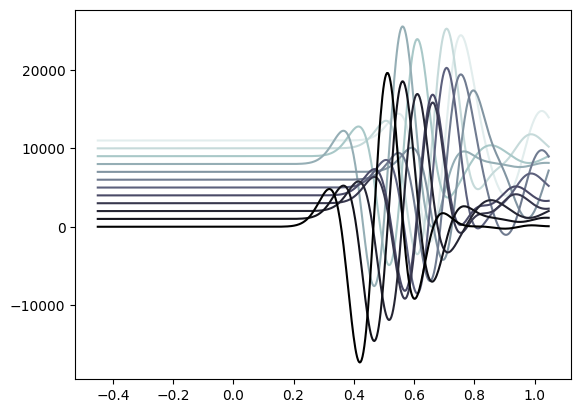

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 1000

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.CXP.semp')

for i,file in enumerate(sorted(files,key=lambda x: int(os.path.basename(x).split('.')[1][1:]),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

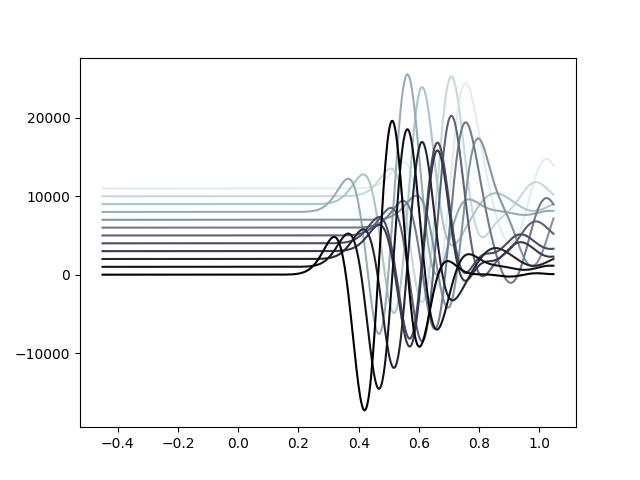

In [18]:
from IPython.display import Image, display
display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


# Run example on GPU

Let's run a default example on the GPU:

In [19]:
%cd /content/specfem3d
%cd EXAMPLES/applications/Gmsh_simple_box_hex27
! ls -al
! ls -al ./bin

/content/specfem3d
/content/specfem3d/EXAMPLES/applications/Gmsh_simple_box_hex27
total 76
drwxr-xr-x  8 root root  4096 Feb 12 15:54 .
drwxr-xr-x 28 root root  4096 Feb 12 15:49 ..
drwxr-xr-x  2 root root  4096 Feb 12 15:54 bin
drwxr-xr-x  2 root root  4096 Feb 12 15:54 DATA
drwxr-xr-x  2 root root  4096 Feb 12 15:54 DATABASES_MPI
drwxr-xr-x  2 root root  4096 Feb 12 15:49 MESH-default
-rwxr-xr-x  1 root root  7254 Feb 12 15:49 mesh_example_with_cubit.py
-rwxr-xr-x  1 root root 26862 Feb 12 15:49 mesh_example_with_Gmsh.py
drwxr-xr-x  2 root root  4096 Feb 12 15:54 OUTPUT_FILES
-rw-r--r--  1 root root  1096 Feb 12 15:49 README
drwxr-xr-x  2 root root  4096 Feb 12 15:49 REF_SEIS
-rwxr-xr-x  1 root root  1766 Feb 12 15:49 run_this_example.sh
total 12
drwxr-xr-x 2 root root 4096 Feb 12 15:54 .
drwxr-xr-x 8 root root 4096 Feb 12 15:54 ..
lrwxrwxrwx 1 root root   31 Feb 12 15:54 xadd_model_iso -> ../../../..//bin/xadd_model_iso
lrwxrwxrwx 1 root root   36 Feb 12 15:54 xcheck_mesh_quality ->

In [20]:
! sed -i "s:^NSTEP .*:NSTEP = 2000:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .true.:" DATA/Par_file
! ./run_this_example.sh

running example: Mon Feb 12 03:54:07 PM UTC 2024

   setting up example...


  decomposing mesh...


 **********************
 Serial mesh decomposer
 **********************

 reading mesh files in: ./MESH-default

   using NGNOD =           27
   quadratic elements

 total number of nodes: 
   nnodes =         9261
 total number of spectral elements:
   nspec =         1000
 materials:
   num_mat =            1
   defined =            1 undefined =            0
   no poroelastic material file found
   defined materials  :            1
   undefined materials:            1  (interfaces/tomography models/..)
 absorbing boundaries:
   nspec2D_xmin =          100
   nspec2D_xmax =          100
   nspec2D_ymin =          100
   nspec2D_ymax =          100
   nspec2D_bottom =          100
   nspec2D_top =          100
   no absorbing_cpml_file file found
   no moho_surface_file file found

 Par_file_faults not found: assuming that there are no faults

 node valence:
   min =            1  max

In [21]:
! ls -al OUTPUT_FILES/

total 1024
drwxr-xr-x 2 root root  4096 Feb 12 15:54 .
drwxr-xr-x 8 root root  4096 Feb 12 15:54 ..
-rw-r--r-- 1 root root   309 Feb 12 15:54 CMTSOLUTION
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X10.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X11.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X12.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X1.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X2.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X3.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X4.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X5.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X6.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X7.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X8.CXP.semp
-rw-r--r-- 1 root root 70000 Feb 12 15:54 DB.X9.CXP.semp
-rw-r--r-- 1 root root   784 Feb 12 15:54 gpu_device_info.txt
-rw-r--r-- 1 root root   107 Feb 12 15:54 gpu_device_mem_usage.txt
-rw-r--r-- 1 root root    79 F

display a figure:

trace:  11 OUTPUT_FILES/DB.X12.CXP.semp
trace:  10 OUTPUT_FILES/DB.X11.CXP.semp
trace:  9 OUTPUT_FILES/DB.X10.CXP.semp
trace:  8 OUTPUT_FILES/DB.X9.CXP.semp
trace:  7 OUTPUT_FILES/DB.X8.CXP.semp
trace:  6 OUTPUT_FILES/DB.X7.CXP.semp
trace:  5 OUTPUT_FILES/DB.X6.CXP.semp
trace:  4 OUTPUT_FILES/DB.X5.CXP.semp
trace:  3 OUTPUT_FILES/DB.X4.CXP.semp
trace:  2 OUTPUT_FILES/DB.X3.CXP.semp
trace:  1 OUTPUT_FILES/DB.X2.CXP.semp
trace:  0 OUTPUT_FILES/DB.X1.CXP.semp


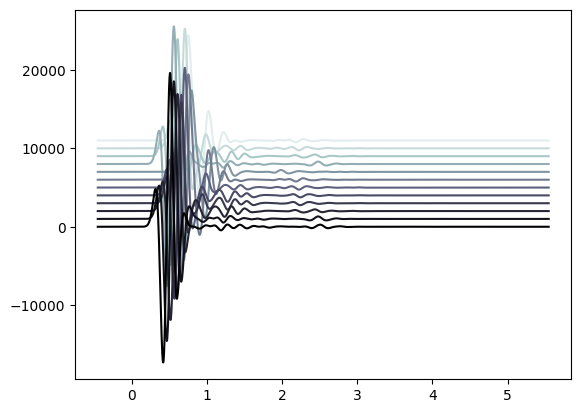

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 1000

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.CXP.semp')

for i,file in enumerate(sorted(files,key=lambda x: int(os.path.basename(x).split('.')[1][1:]),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

#from IPython.display import Image, display
#display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


compare the result against the reference solution:

In [23]:
! rm -f compare_seismogram_correlations.py
! ln -s ../../../utils/scripts/compare_seismogram_correlations.py
! ./compare_seismogram_correlations.py REF_SEIS/ OUTPUT_FILES/


comparing seismograms
  reference directory: OUTPUT_FILES/
  output directory   : REF_SEIS/

  time step: reading from first file  REF_SEIS/DB.X1.CXP.semp
  time step: size =  0.002999991000000035

comparing  12 seismograms

|file name                     |          corr|           err|    time shift|
|DB.X1.CXP.semp                |       1.00000|   1.00009e-05|  -2.92313e-09| 
|DB.X10.CXP.semp               |       1.00000|   1.36529e-05|  -3.06829e-09| 
|DB.X11.CXP.semp               |       1.00000|   1.71246e-05|   3.17467e-09| 
|DB.X12.CXP.semp               |       1.00000|   1.42953e-05|   4.22915e-09| 
|DB.X2.CXP.semp                |       1.00000|   1.27787e-05|  -4.12363e-09| 
|DB.X3.CXP.semp                |       1.00000|   1.34021e-05|  -1.14274e-08| 
|DB.X4.CXP.semp                |       1.00000|   1.45996e-05|   7.03461e-10| 
|DB.X5.CXP.semp                |       1.00000|   1.31127e-05|  -1.73973e-09| 
|DB.X6.CXP.semp                |       1.00000|   1.46607e-05|  -

all done.